# Example of Graph Neural Network

In [3]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.metrics import auc
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# import seaborn as sns
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
import wandb

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../../..")
device = "cuda" if torch.cuda.is_available() else "cpu"

from LightningModules.GNN.Models.hetero_gnn import HeteroGNN
from LightningModules.GNN.Models.interaction_gnn import InteractionGNN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

In [3]:
with open("hetero_gnn.yaml") as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
model = HeteroGNN(hparams)

## Build New HeteroGraphs

In [5]:
base_dir = "/global/cfs/cdirs/m3443/data/ITk-upgrade/processed/filter_processed/0GeV_v3"
new_save_path = "/global/cfs/cdirs/m3443/data/ITk-upgrade/processed/hetero_processed/0GeV_v3"
build_hetero_graphs(base_dir, new_save_path, use_process_map=True)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

## Train GNN

In [5]:
logger = WandbLogger(
    project=hparams["project"], group="InitialTest", save_dir=hparams["artifacts"]
)
trainer = Trainer(
    gpus=1, max_epochs=hparams["max_epochs"], logger=logger
)  # , precision=16)
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type       | Params
------------------------------------------------------
0 | node_encoders          | ModuleList | 33.5 K
1 | edge_encoders          | ModuleList | 65.9 K
2 | edge_network           | Sequential | 82.3 K
3 | node_network           | Sequential | 82.3 K
4 | output_edge_classifier | Sequential | 82.4 K
------------------------------------------------------
346 K     Trainable params
0         Non-trainable params
346 K     Total params
1.386     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

## Performance Validation

### Roadmap

1. Make model loading function
2. Make robust inference function
3. Make well-partitioned eta & pt performance functions
4. Make performance plotting function

In [17]:
from gnn_utils import run_eta_performance, run_pt_performance

### 500MeV Background Cut

Single model across whole detector:

100%|██████████| 50/50 [00:00<00:00, 2139.67it/s]


Signal efficiency: tensor(0.9602) Signal purity: tensor(0.4745) Background purity: tensor(0.9872)


100%|██████████| 50/50 [00:01<00:00, 25.88it/s]


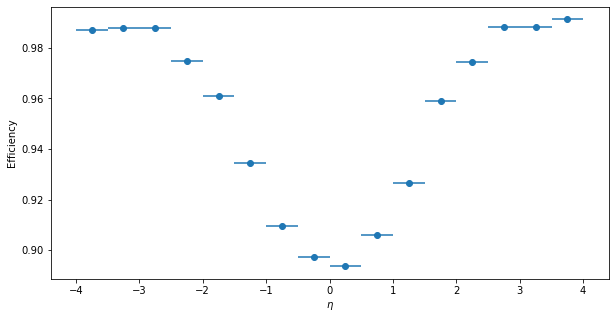

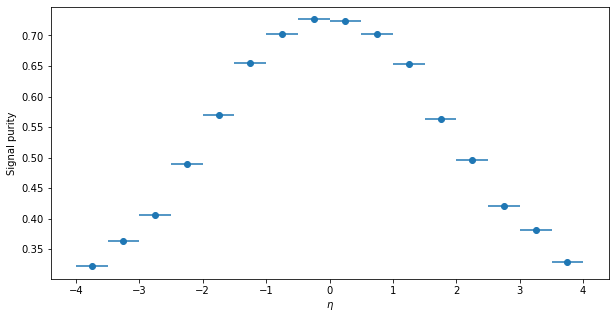

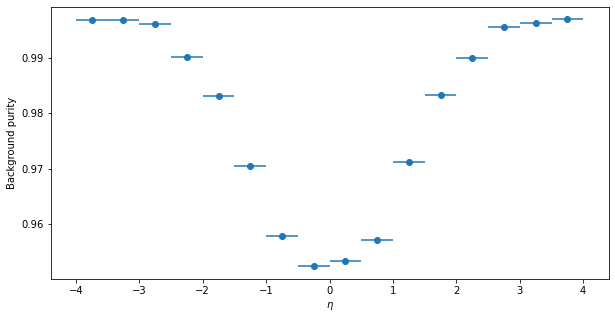

In [31]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/s24qvk82/checkpoints"
single_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 50, 0.5)

Dedicated model for barrel strip:

100%|██████████| 50/50 [00:00<00:00, 1057.41it/s]


Signal efficiency: tensor(0.9767) Signal purity: tensor(0.4712) Background purity: tensor(0.9901)


100%|██████████| 50/50 [00:05<00:00,  8.48it/s]


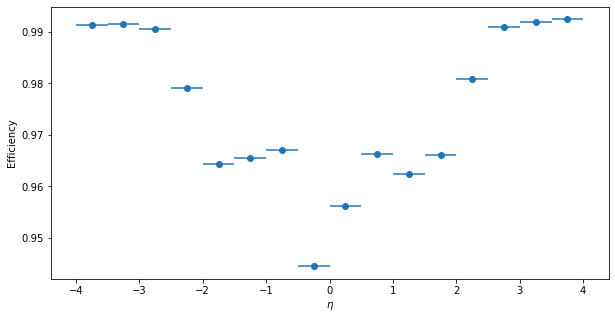

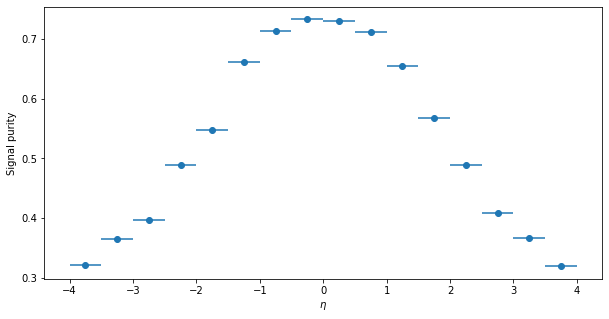

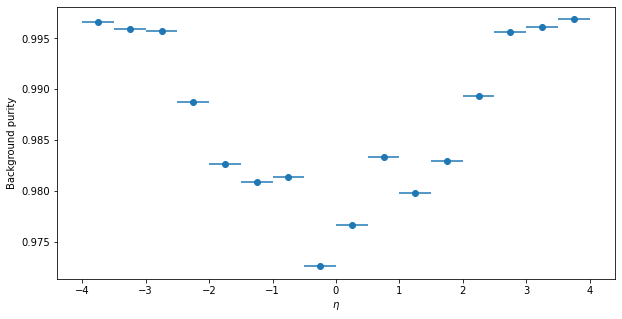

In [ ]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/279a4w3h/checkpoints"
double_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 50, 0.5)

Dedicated models for barrel strip, endcap strip, and pixels:

100%|██████████| 50/50 [00:00<00:00, 2030.86it/s]


Signal efficiency: tensor(0.9773) Signal purity: tensor(0.4693) Background purity: tensor(0.9893)


100%|██████████| 50/50 [00:01<00:00, 27.64it/s]


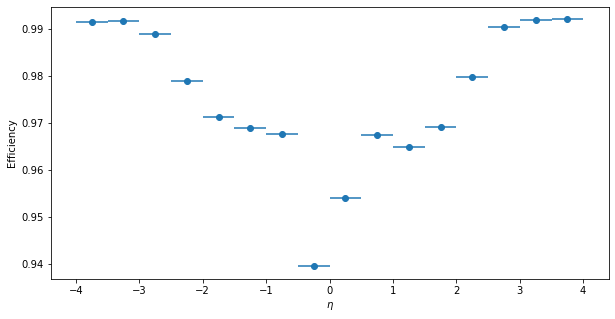

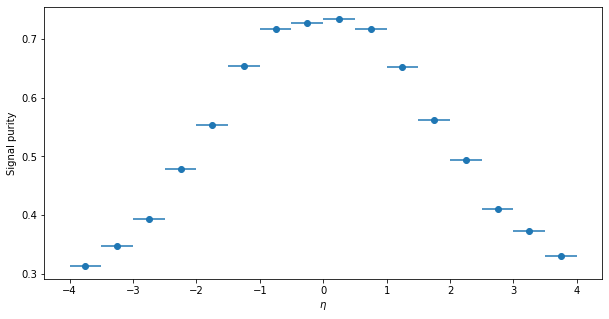

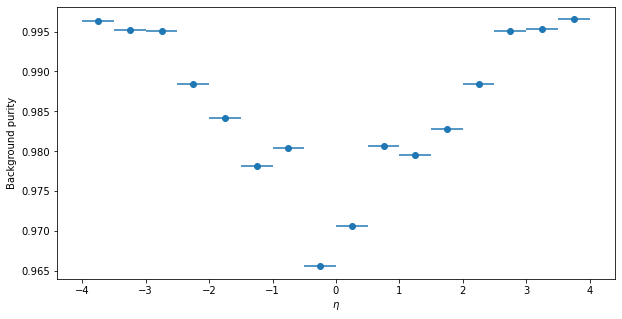

In [50]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/2dcoq1gt/checkpoints"
triple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 50, 0.5)

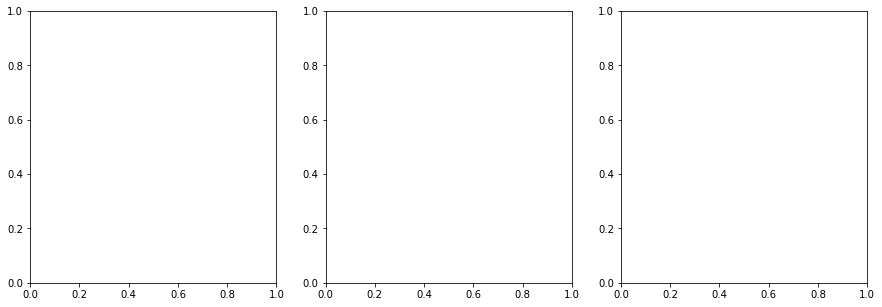

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

In [67]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/s24qvk82/checkpoints"
single_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 2301.62it/s]


Signal efficiency: tensor(0.9603) Signal purity: tensor(0.4745) Background purity: tensor(0.9873)


100%|██████████| 100/100 [00:03<00:00, 28.08it/s]


In [68]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/279a4w3h/checkpoints"
double_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 2127.86it/s]


Signal efficiency: tensor(0.9769) Signal purity: tensor(0.4722) Background purity: tensor(0.9899)


100%|██████████| 100/100 [00:03<00:00, 27.23it/s]


In [69]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/2dcoq1gt/checkpoints"
triple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 1592.47it/s]


Signal efficiency: tensor(0.9771) Signal purity: tensor(0.4716) Background purity: tensor(0.9892)


100%|██████████| 100/100 [00:03<00:00, 27.14it/s]


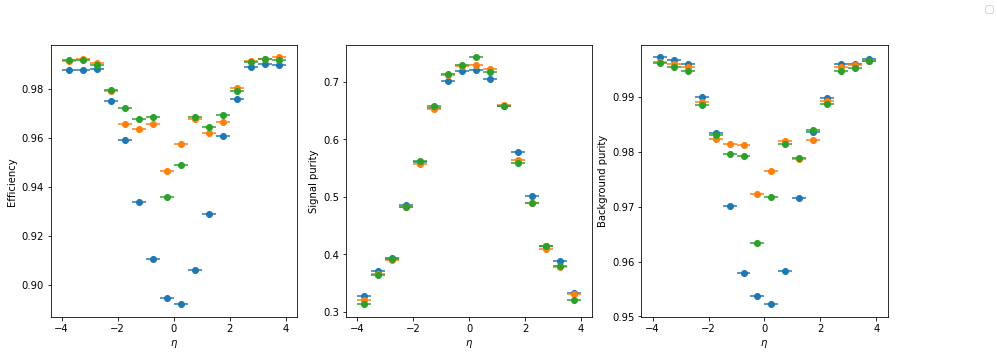

In [73]:
fig
# Add a legend


### 100MeV Background Cut

Single model across whole detector:

100%|██████████| 100/100 [00:00<00:00, 1513.44it/s]


Signal efficiency: tensor(0.9407) Signal purity: tensor(0.4272) Background purity: tensor(0.9796)


100%|██████████| 100/100 [00:03<00:00, 25.55it/s]


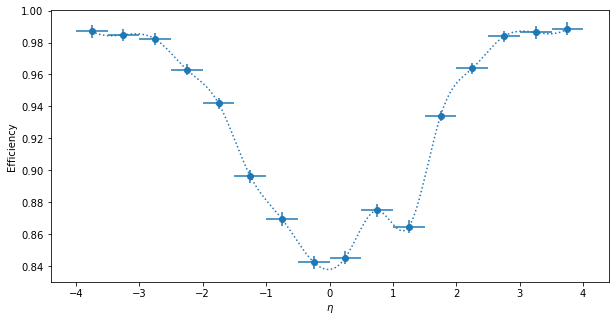

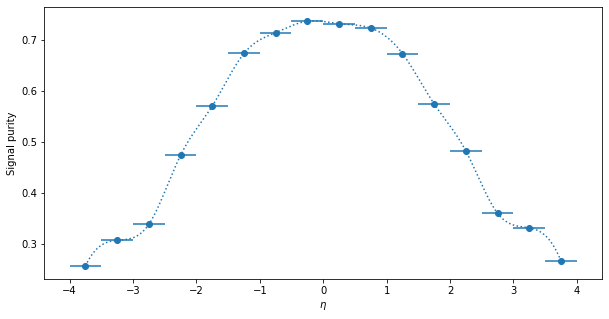

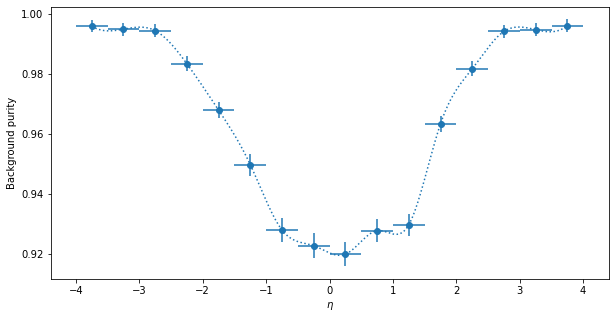

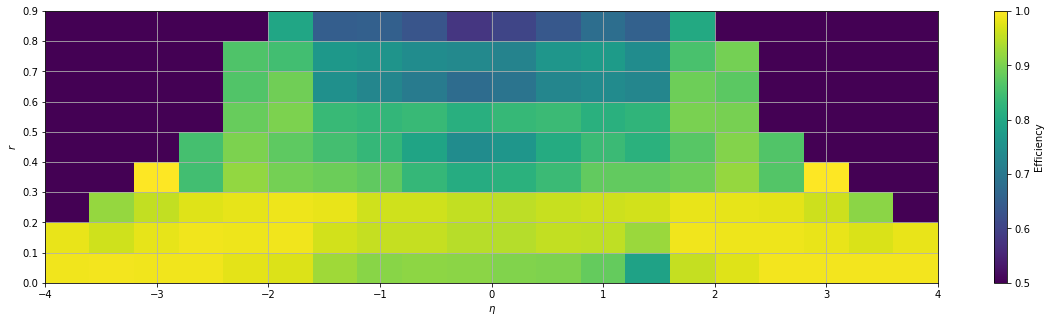

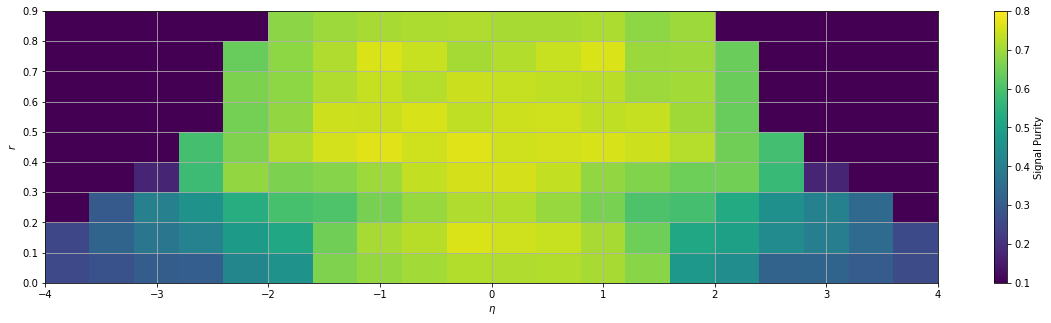

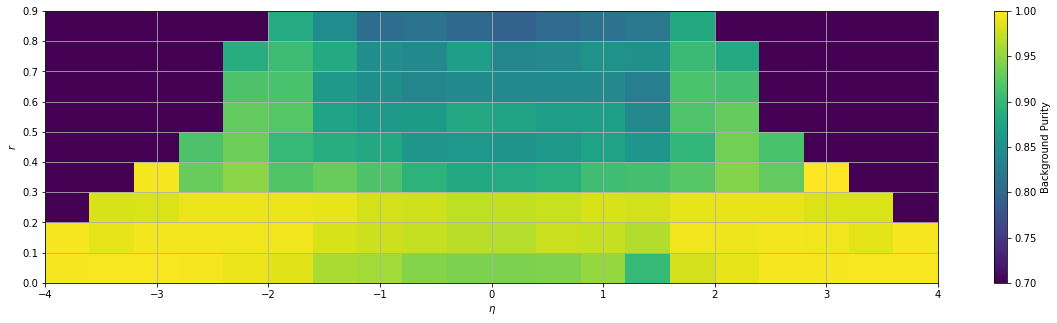

In [282]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/1r11mdlv/checkpoints/epoch=48-step=21608.ckpt"
single_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.7], vmax=[1.0, 0.8, 1.0])

Dedicated model for barrel strip:

100%|██████████| 100/100 [00:00<00:00, 1459.66it/s]


Signal efficiency: tensor(0.9446) Signal purity: tensor(0.4316) Background purity: tensor(0.9824)


100%|██████████| 100/100 [00:03<00:00, 26.49it/s]


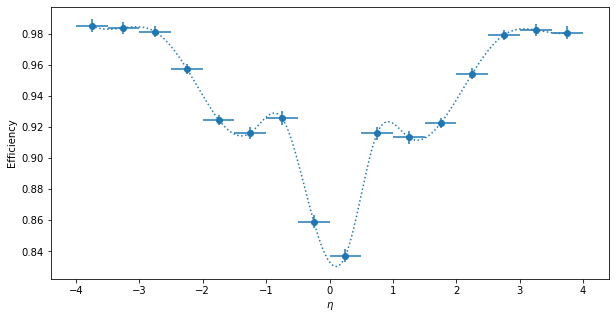

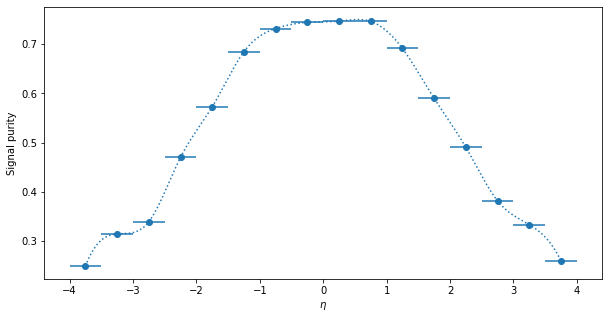

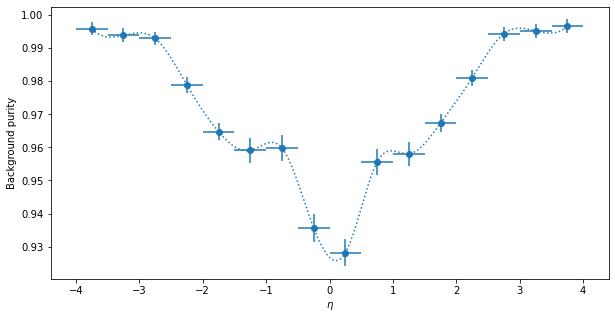

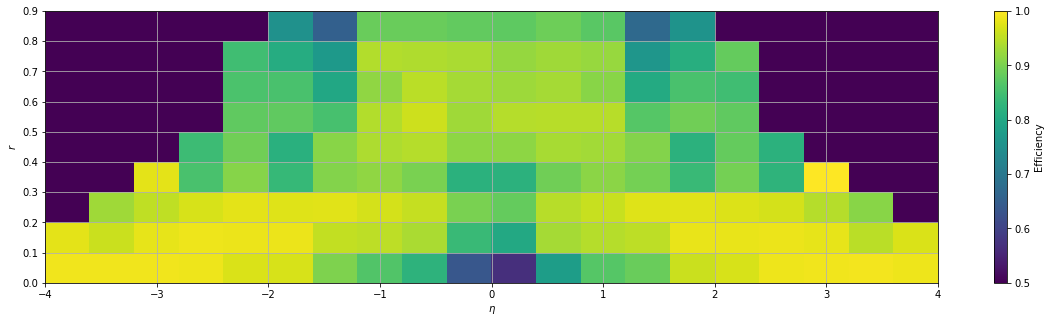

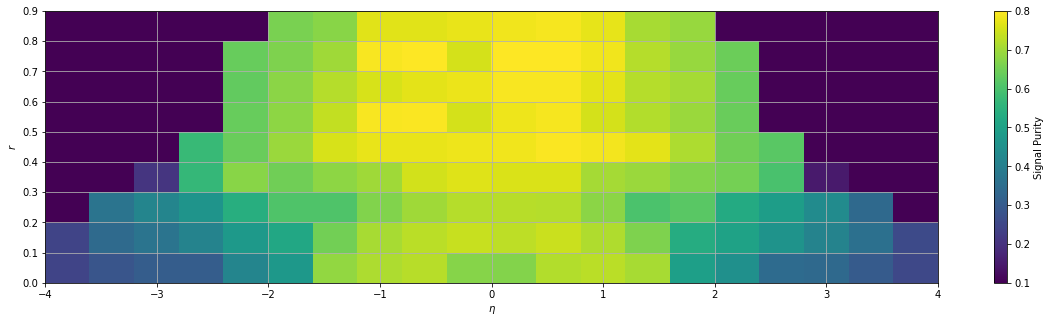

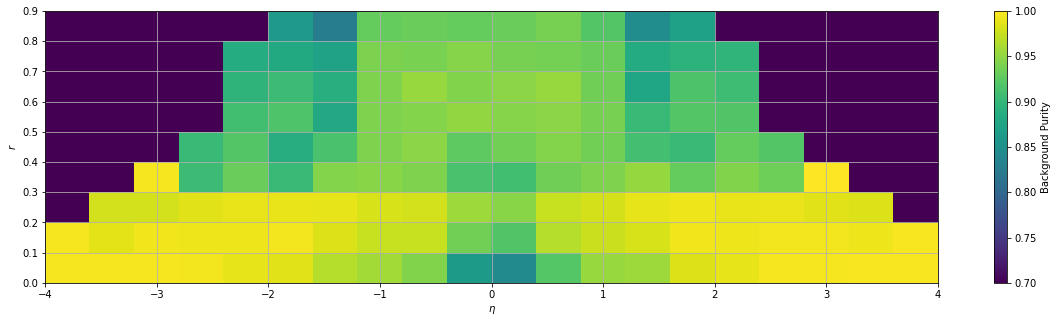

In [283]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/3npdp63i/checkpoints"
double_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.7], vmax=[1.0, 0.8, 1.0])

Dedicated models for barrel strip, endcap strip, and pixels:

100%|██████████| 100/100 [00:00<00:00, 1508.97it/s]


Signal efficiency: tensor(0.9603) Signal purity: tensor(0.4156) Background purity: tensor(0.9858)


100%|██████████| 100/100 [00:03<00:00, 26.20it/s]


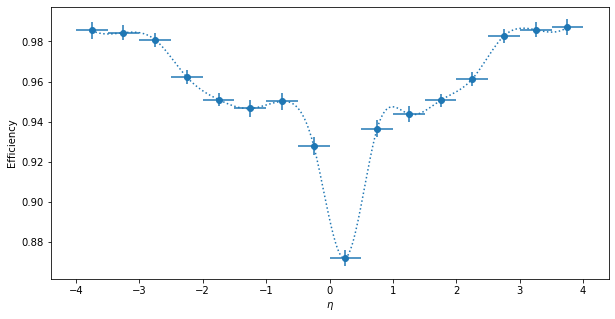

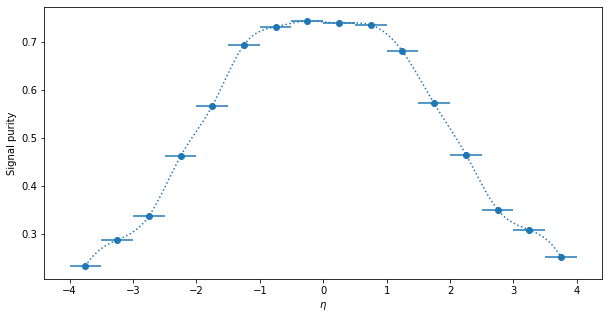

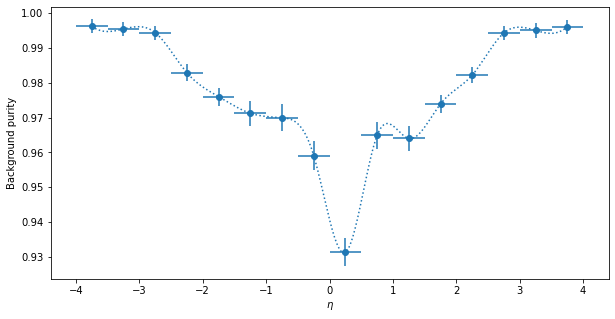

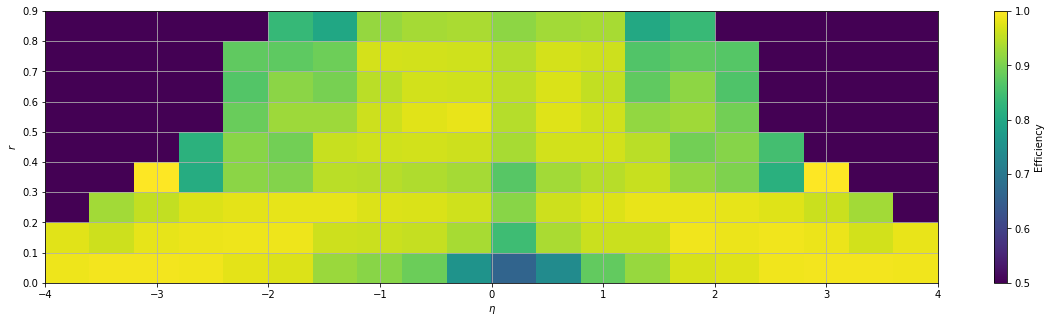

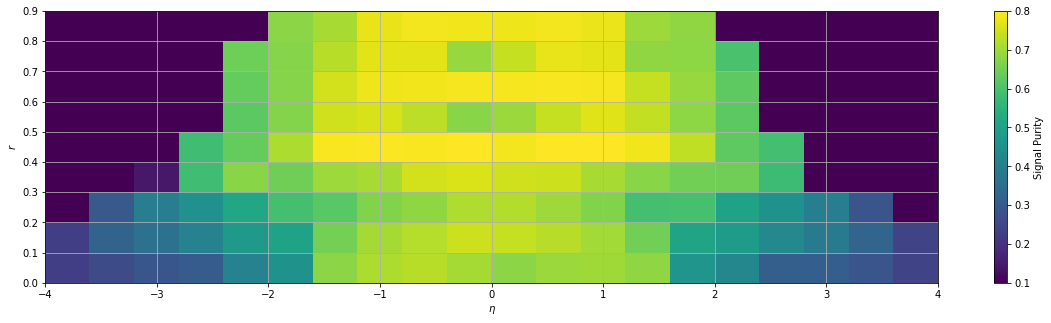

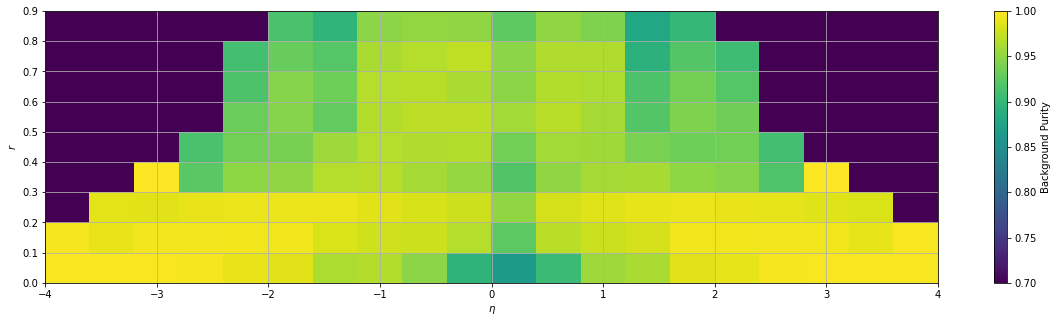

In [284]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/2gfjqzxn/checkpoints/epoch=42-step=18549.ckpt"
triple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.7], vmax=[1.0, 0.8, 1.0])

Dedicated models for each volume:

100%|██████████| 100/100 [00:00<00:00, 437.77it/s]


Signal efficiency: tensor(0.9596) Signal purity: tensor(0.4226) Background purity: tensor(0.9878)


100%|██████████| 100/100 [00:03<00:00, 25.04it/s]


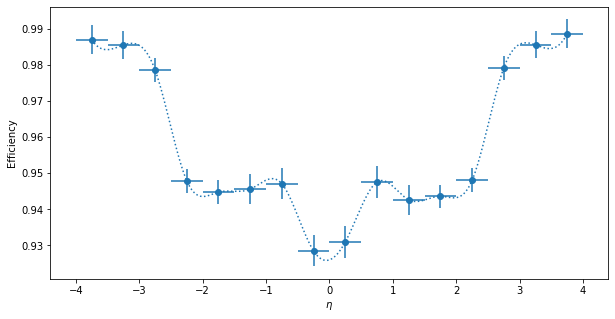

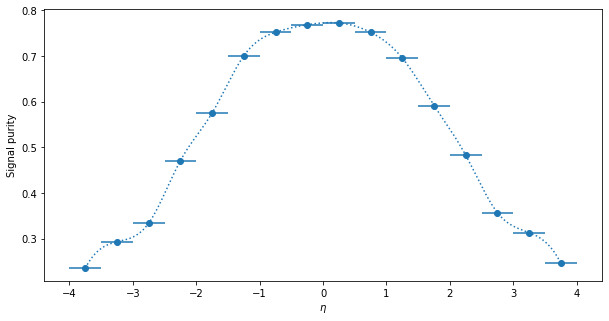

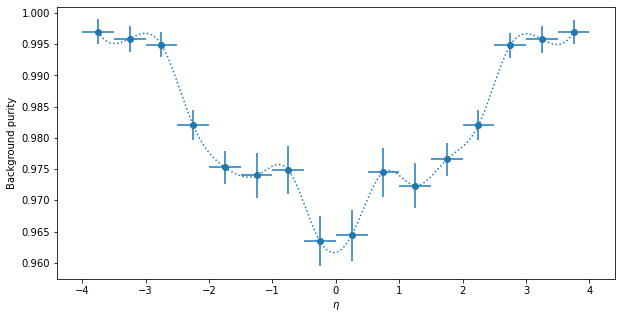

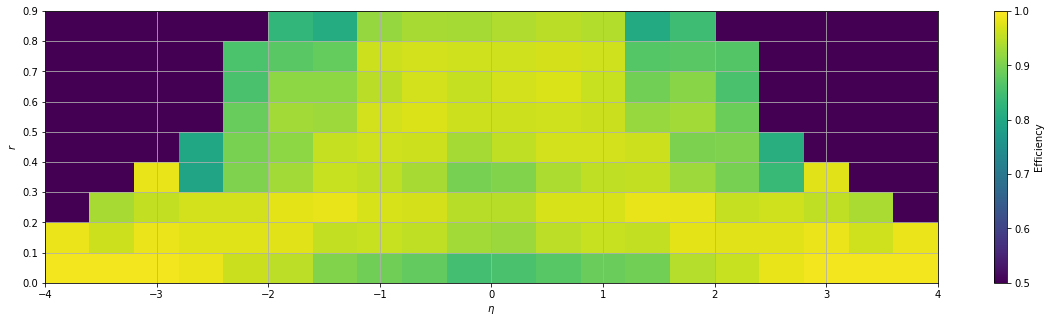

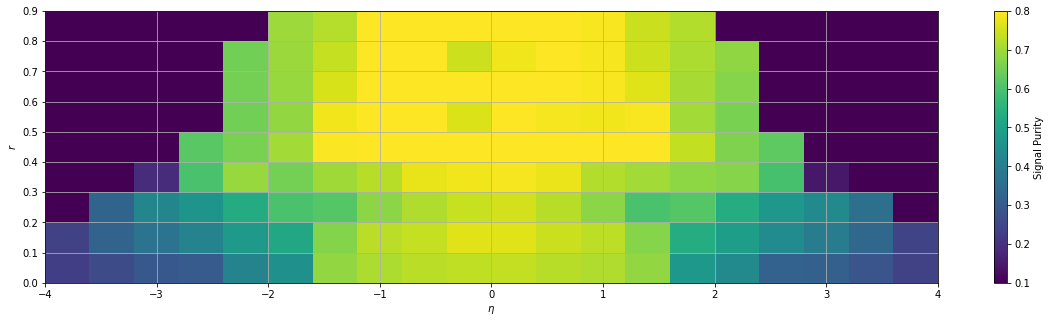

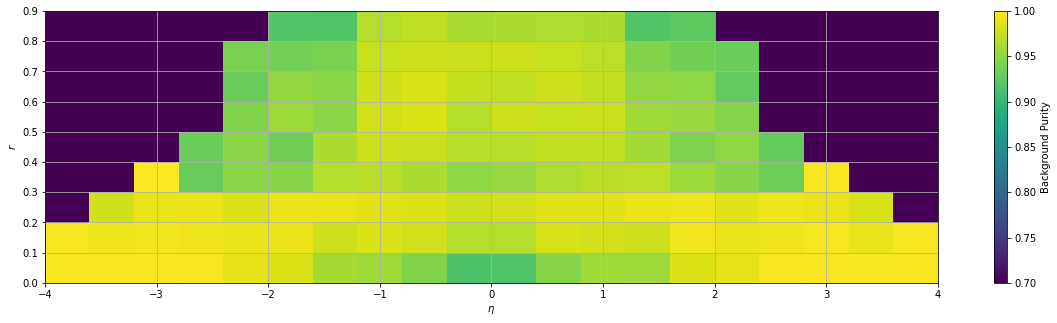

In [3]:
# checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/1sx232yt/checkpoints"
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/3gnj946g/checkpoints"
triple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.7], vmax=[1.0, 0.8, 1.0])

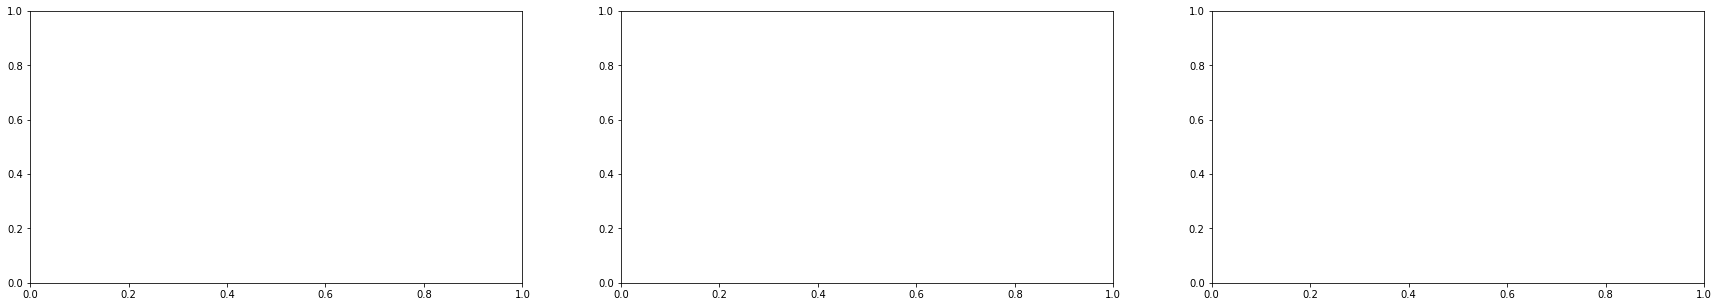

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5));

In [5]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/1r11mdlv/checkpoints/epoch=48-step=21608.ckpt"
single_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 356.22it/s]


Signal efficiency: tensor(0.9400) Signal purity: tensor(0.4268) Background purity: tensor(0.9794)


100%|██████████| 100/100 [00:04<00:00, 24.11it/s]


In [6]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/3npdp63i/checkpoints"
double_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 441.66it/s]


Signal efficiency: tensor(0.9451) Signal purity: tensor(0.4335) Background purity: tensor(0.9827)


100%|██████████| 100/100 [00:04<00:00, 24.14it/s]


In [7]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/2gfjqzxn/checkpoints/epoch=42-step=18549.ckpt"
triple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 319.02it/s]


Signal efficiency: tensor(0.9609) Signal purity: tensor(0.4116) Background purity: tensor(0.9859)


100%|██████████| 100/100 [00:05<00:00, 17.41it/s]


In [8]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_Toy_HeteroGNN/3gnj946g/checkpoints"
quadruple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 545.04it/s]


Signal efficiency: tensor(0.9604) Signal purity: tensor(0.4204) Background purity: tensor(0.9877)


100%|██████████| 100/100 [00:03<00:00, 27.61it/s]


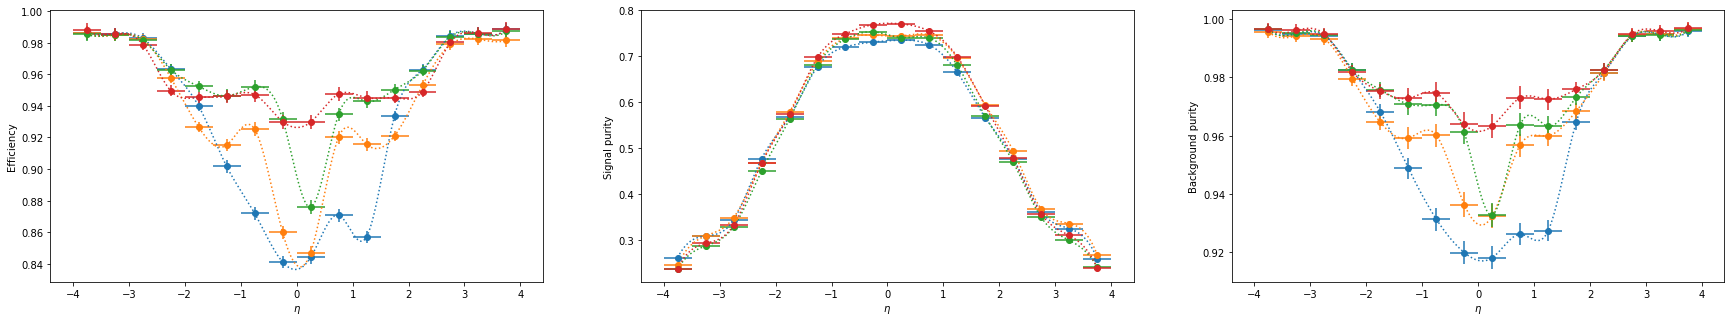

In [9]:
fig

### Full Detector & Dataset

Single model across whole detector:

100%|██████████| 100/100 [00:00<00:00, 1876.30it/s]


Signal efficiency: tensor(0.9487) Signal purity: tensor(0.4015) Background purity: tensor(0.8463)


100%|██████████| 100/100 [00:01<00:00, 57.30it/s]


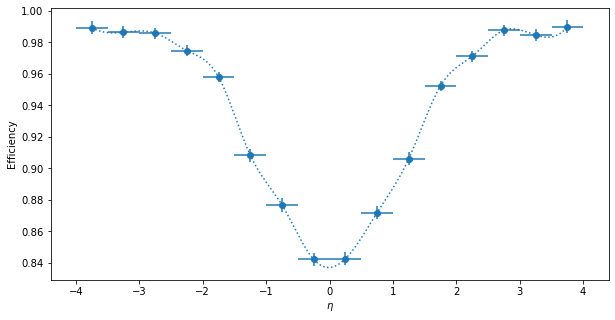

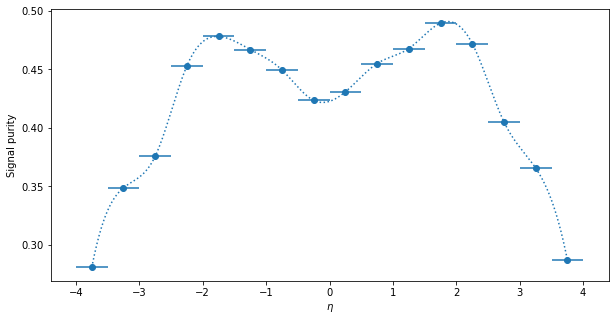

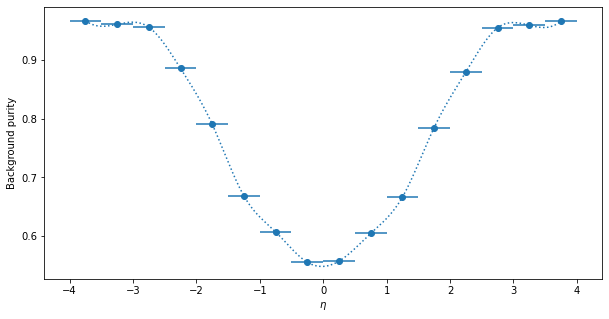

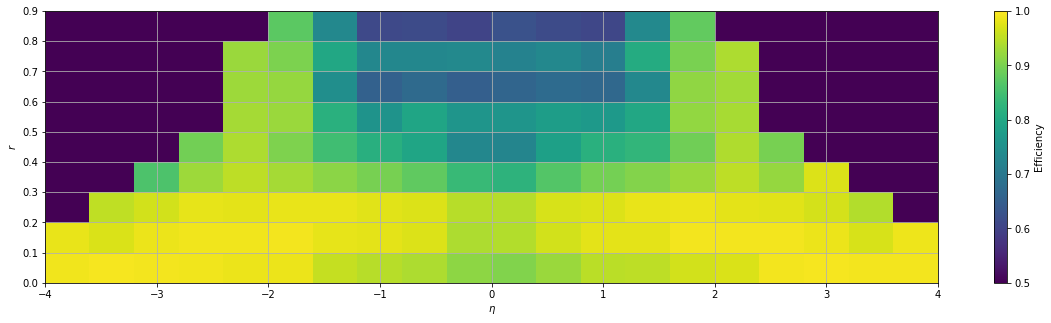

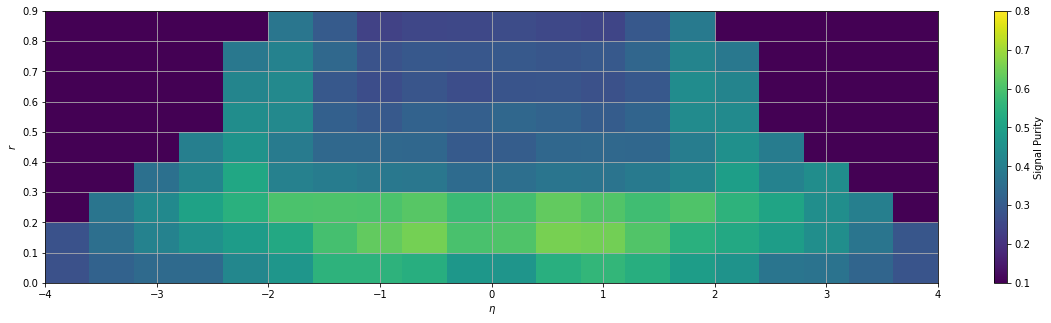

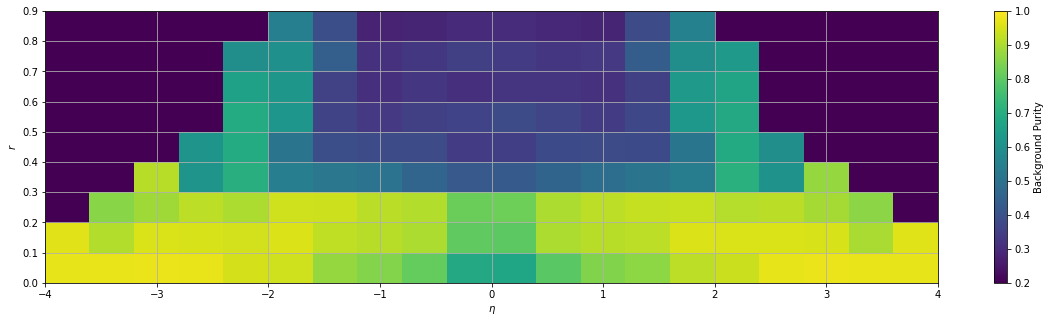

In [14]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_GNN/1j1uwy9r/checkpoints/epoch=76-step=38499.ckpt"
single_model_figs = run_eta_performance(checkpoint_path, InteractionGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.2], vmax=[1.0, 0.8, 1.0])

Dedicated models for each volume:

100%|██████████| 100/100 [00:00<00:00, 1559.28it/s]


Signal efficiency: tensor(0.9709) Signal purity: tensor(0.4640) Background purity: tensor(0.9380)


100%|██████████| 100/100 [00:03<00:00, 27.72it/s]


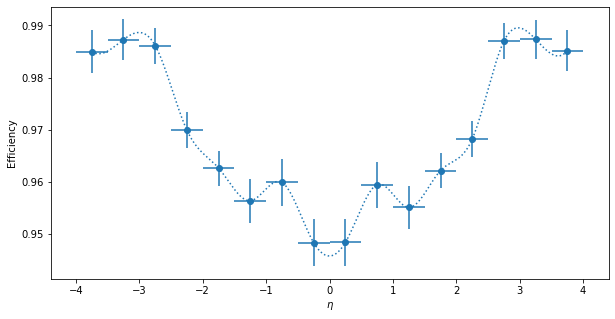

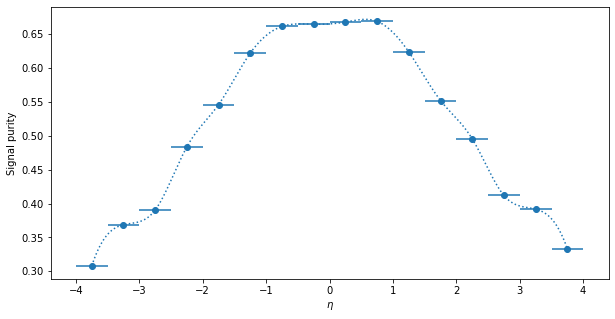

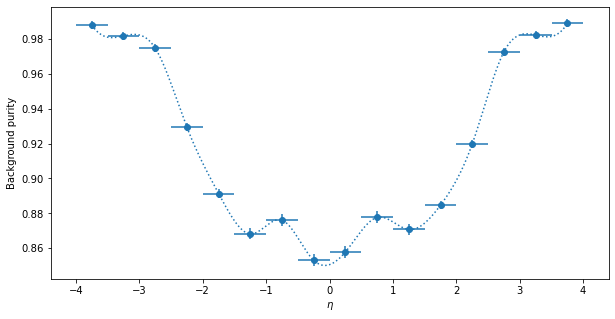

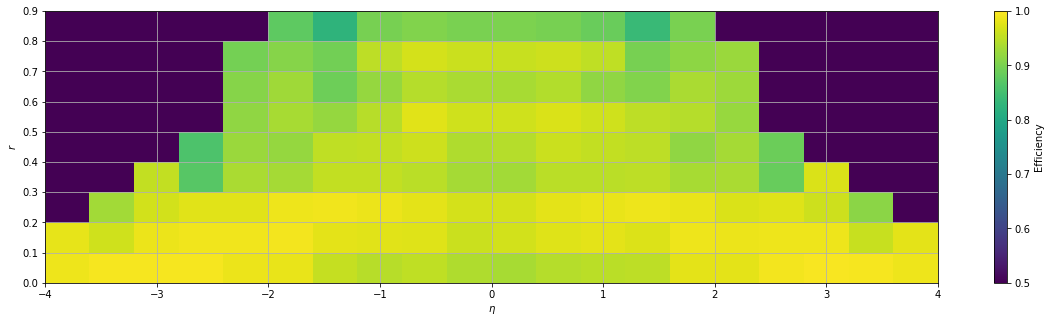

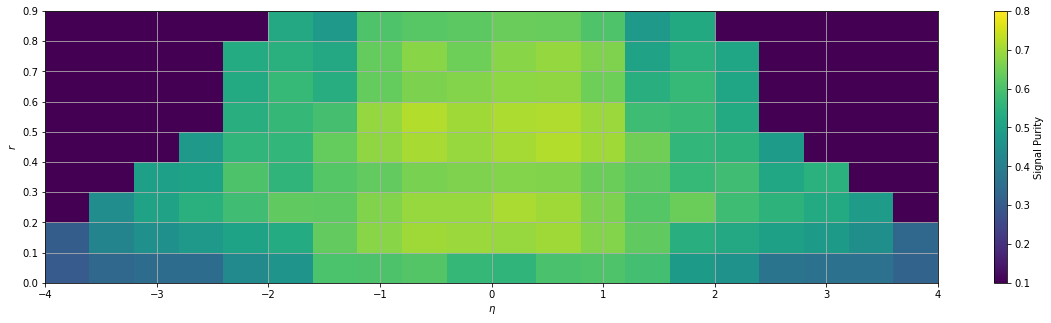

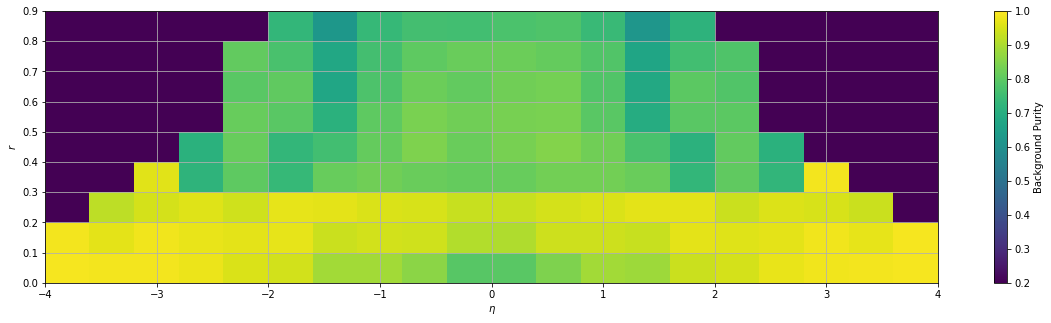

In [15]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_HeteroGNN/z8txsx3g/checkpoints/epoch=84-step=19786.ckpt"
triple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.2], vmax=[1.0, 0.8, 1.0])

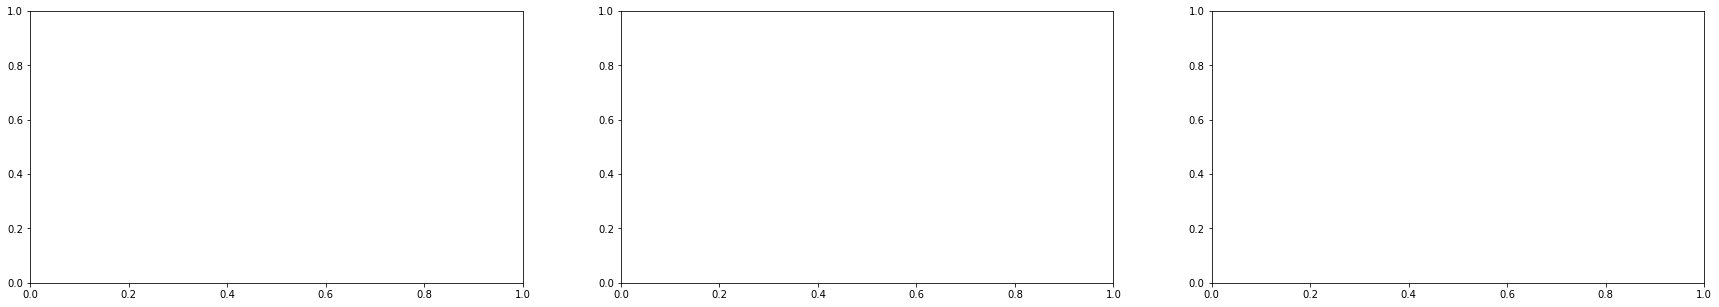

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5));

In [11]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_GNN/1j1uwy9r/checkpoints/epoch=76-step=38499.ckpt"
single_model_figs = run_eta_performance(checkpoint_path, InteractionGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.2], vmax=[1.0, 0.8, 1.0], common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 1000.41it/s]


Signal efficiency: tensor(0.9484) Signal purity: tensor(0.3974) Background purity: tensor(0.8432)


100%|██████████| 100/100 [00:01<00:00, 56.93it/s]


In [12]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_HeteroGNN/z8txsx3g/checkpoints/epoch=84-step=19786.ckpt"
quadruple_model_figs = run_eta_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5, vmin=[0.5, 0.1, 0.2], vmax=[1.0, 0.8, 1.0], common_axes = axs)

100%|██████████| 100/100 [00:00<00:00, 1221.67it/s]


Signal efficiency: tensor(0.9702) Signal purity: tensor(0.4657) Background purity: tensor(0.9369)


100%|██████████| 100/100 [00:03<00:00, 25.23it/s]


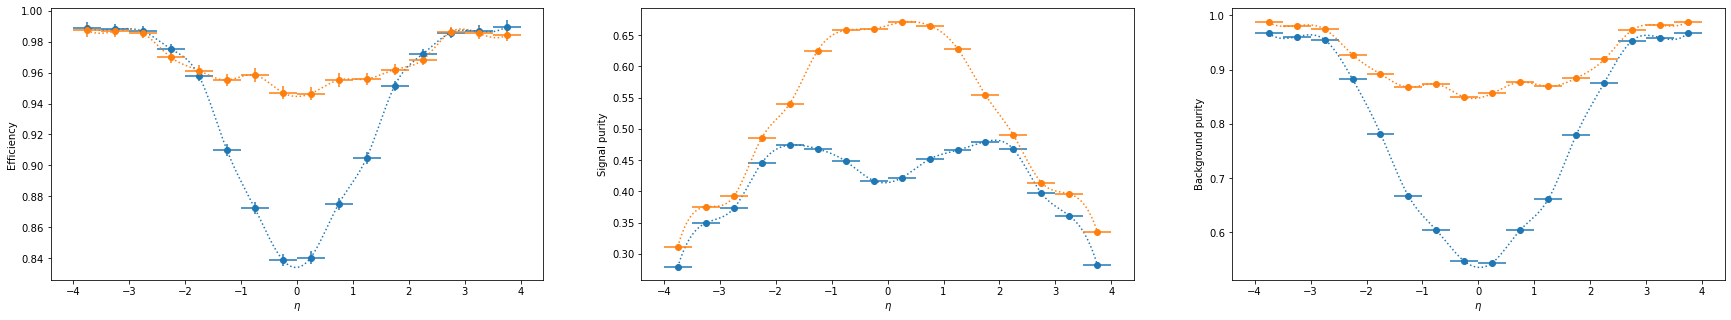

In [13]:
fig

#### pT Plots

100%|██████████| 100/100 [00:00<00:00, 1890.74it/s]


Signal efficiency: tensor(0.9489) Signal purity: tensor(0.4010) Background purity: tensor(0.8434)


100%|██████████| 100/100 [00:00<00:00, 298.55it/s]


[<AxesSubplot:xlabel='$p_{T} (MeV)$', ylabel='Efficiency'>, None, None]

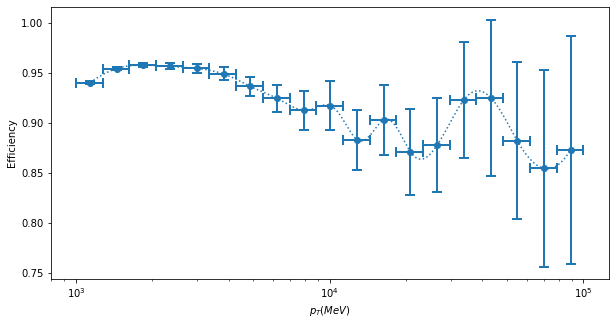

In [70]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_GNN/1j1uwy9r/checkpoints/epoch=76-step=38499.ckpt"
run_pt_performance(checkpoint_path, InteractionGNN, "train", 100, 0.5)

100%|██████████| 100/100 [00:00<00:00, 2123.03it/s]


Signal efficiency: tensor(0.9706) Signal purity: tensor(0.4638) Background purity: tensor(0.9371)


100%|██████████| 100/100 [00:00<00:00, 333.96it/s]


[<AxesSubplot:xlabel='$p_{T} (MeV)$', ylabel='Efficiency'>, None, None]

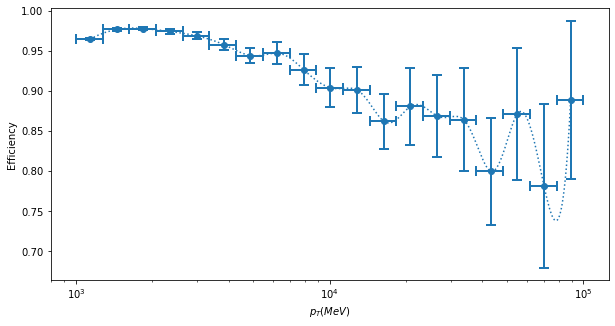

In [71]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_HeteroGNN/z8txsx3g/checkpoints/epoch=84-step=19786.ckpt"
run_pt_performance(checkpoint_path, HeteroGNN, "train", 100, 0.5)

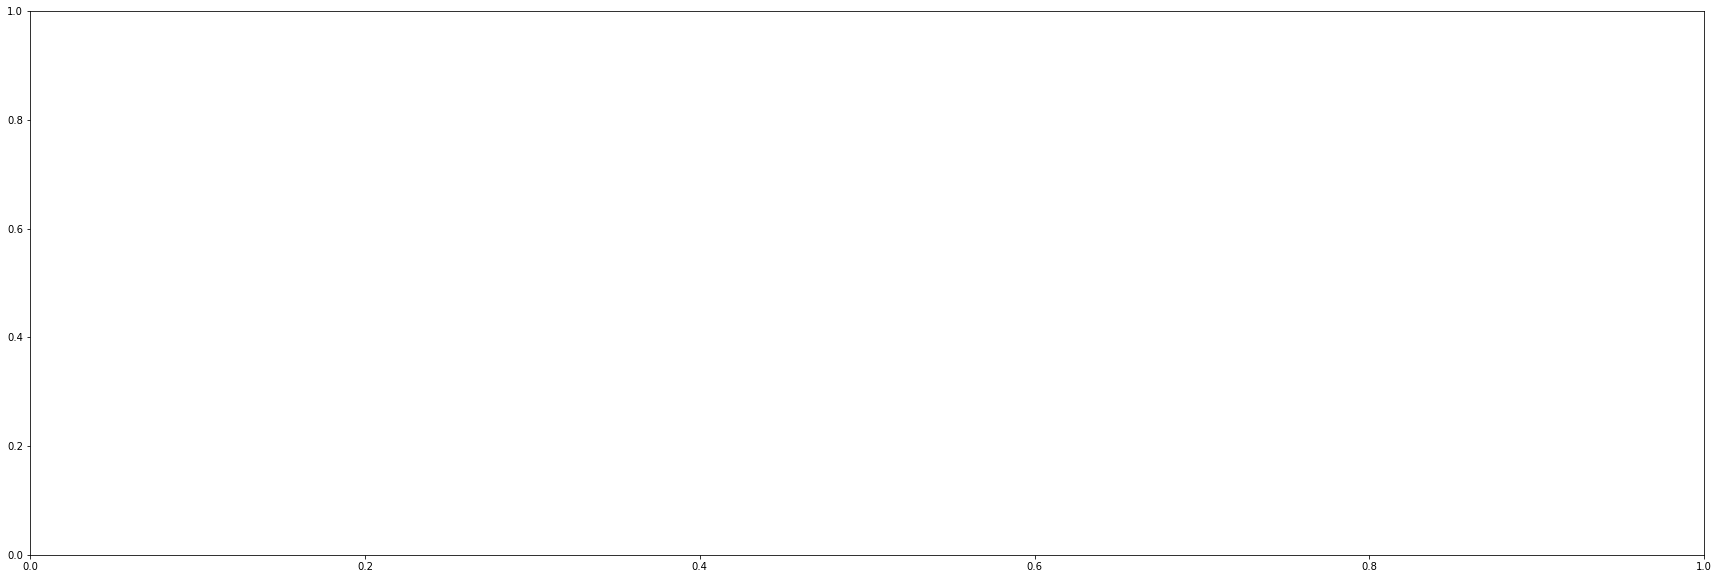

In [72]:
fig, axs = plt.subplots(1, 1, figsize=(30, 10));

In [73]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_GNN/1j1uwy9r/checkpoints/epoch=76-step=38499.ckpt"
single_model_figs = run_pt_performance(checkpoint_path, InteractionGNN, "train", 200, 0.5, common_axes = axs)

100%|██████████| 200/200 [00:00<00:00, 1262.23it/s]


Signal efficiency: tensor(0.9480) Signal purity: tensor(0.3990) Background purity: tensor(0.8424)


100%|██████████| 200/200 [00:00<00:00, 297.92it/s]


In [74]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_HeteroGNN/z8txsx3g/checkpoints/epoch=84-step=19786.ckpt"
quadruple_model_figs = run_pt_performance(checkpoint_path, HeteroGNN, "train", 200, 0.5, common_axes = axs)

100%|██████████| 200/200 [00:00<00:00, 1370.61it/s]


Signal efficiency: tensor(0.9708) Signal purity: tensor(0.4636) Background purity: tensor(0.9374)


100%|██████████| 200/200 [00:00<00:00, 309.84it/s]


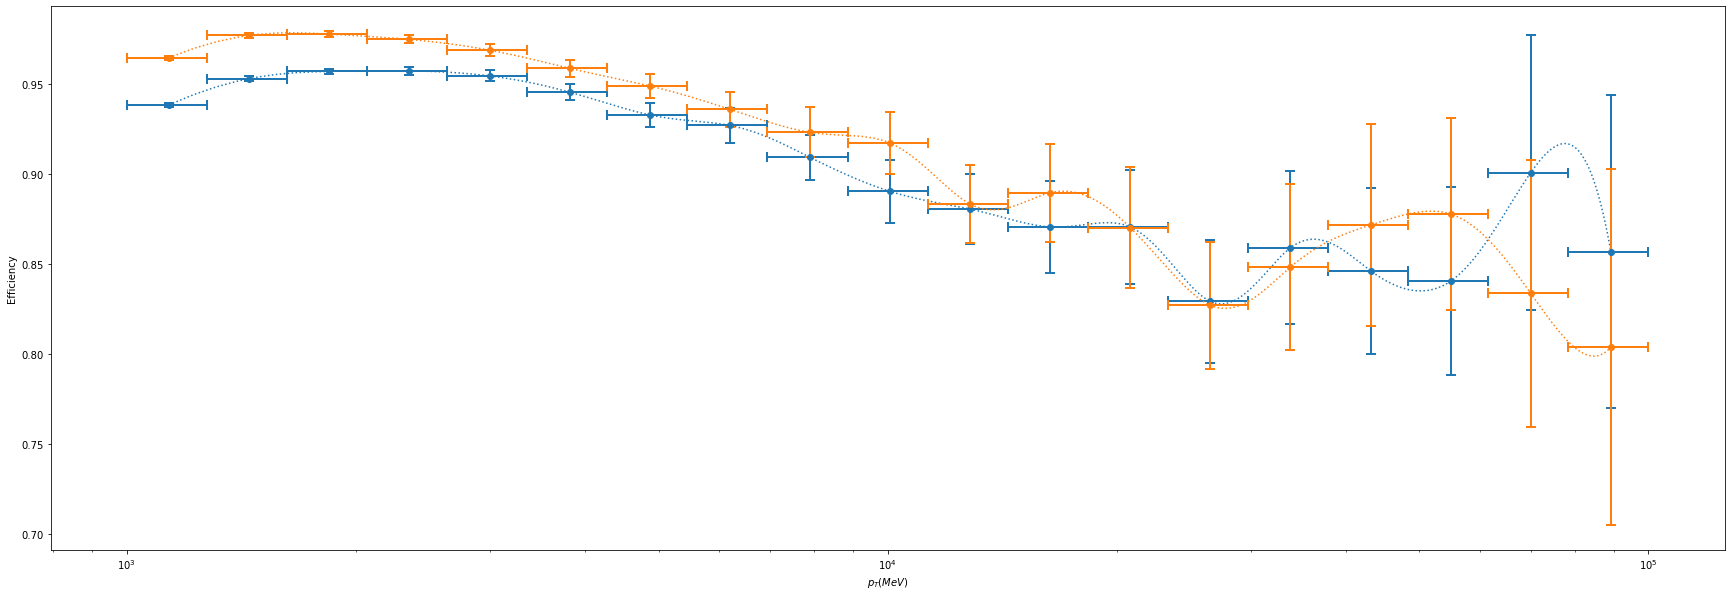

In [75]:
fig

### Develop Better Plotter Based on XY Functions

In [89]:
from scipy import stats

In [84]:
from gnn_utils import load_model, inference, get_topline_stats, build_edge_eta_list, calc_eta

In [80]:
checkpoint_path = "/global/cfs/cdirs/m3443/data/lightning_models/lightning_checkpoints/ITk_1GeVSignal_HeteroGNN/z8txsx3g/checkpoints/epoch=84-step=19786.ckpt"
model, _ = load_model(checkpoint_path, HeteroGNN)
model.setup(stage="fit")

In [81]:
sample = model.trainset[0]

In [120]:
pt, eta = [], []

for sample in model.trainset[:100]:
    valid_pt = (sample.pt == sample.pt) & (sample.pt > 1000)
    pt.append(sample.pt[valid_pt])
    eta.append(calc_eta(sample.x[:, 0], sample.x[:, 2])[valid_pt])

# Concat
pt = np.concatenate(pt)
eta = np.concatenate(eta)

In [121]:
num_bins = 12
bins = np.linspace(-4, 4, num_bins)
mean = stats.binned_statistic(eta, pt, bins=bins)[0]
median = stats.binned_statistic(eta, pt, bins=bins, statistic="median")[0]
max = stats.binned_statistic(eta, pt, bins=bins, statistic="max")[0]
std = stats.binned_statistic(eta, pt, bins=bins, statistic="std")[0]

([<matplotlib.lines.Line2D at 0x7f099454e460>],
 Text(0.5, 0, '$\\eta$'),
 Text(0, 0.5, 'mean $p_T$ (MeV)'))

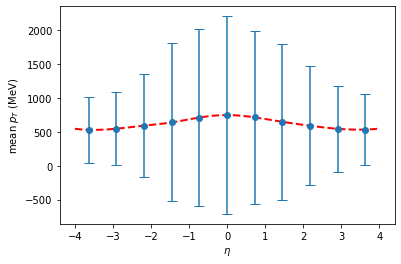

In [116]:
# Mean and std across eta bins
centers = (bins[:-1] + bins[1:]) / 2
plt.errorbar(centers, mean, yerr=std, fmt="o", capsize=5)

# Add cubic spline trendline
spline = scipy.interpolate.UnivariateSpline(centers, mean, k=3, s=0)
x = np.linspace(-4, 4, 100)
plt.plot(x, spline(x), "r--", lw=2), plt.xlabel("$\eta$"), plt.ylabel("mean $p_T$ (MeV)")


Text(-4.0, -4.0, '$p_T > 1GeV$')

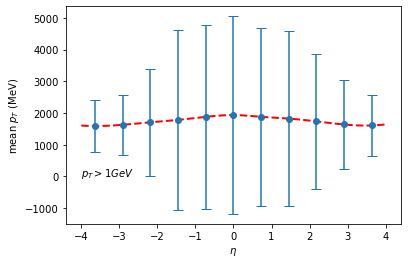

In [135]:
# Mean and std across eta bins
centers = (bins[:-1] + bins[1:]) / 2
plt.errorbar(centers, mean, yerr=std, fmt="o", capsize=5)

# Add cubic spline trendline
spline = scipy.interpolate.UnivariateSpline(centers, mean, k=3, s=0)
x = np.linspace(-4, 4, 100)
plt.plot(x, spline(x), "r--", lw=2), plt.xlabel("$\eta$"), plt.ylabel("mean $p_T$ (MeV)")
# Add text in corner of plot
plt.text(-4., -4., "$p_T > 1GeV$", fontsize=10)
